In [14]:
import pandas as pd # provide rows & columns for analysis
import numpy as np #  provide multidimensional array
import string
import pickle
import nltk
from matplotlib import pyplot as plt  # provide plotting of 2d graphs
%matplotlib inline

In [15]:
df = pd.read_csv('Twitter.csv', index_col=[0])

In [16]:
df.head(30)

,tweet_text,username,all_hashtags,followers_count
timestamp,,,,
20-11-2020 18:11,"Mr. @realDonaldTrump, a World Class Businessma...",AdhikarAspires',['USAelections2020'],186
20-11-2020 18:09,@smitaprakash Miles to go before I sleep.....m...,_itsKunalSingh',"['USAElections2020', 'Election2020results', 'A...",240
20-11-2020 18:08,Michigan GOP lawmakers heckled on arrival for ...,MullerDonUK',"['TRUMP', 'AMERICA', 'DEMOCRACY', 'USA', 'Elec...",130
20-11-2020 17:48,#USA\xe2\x80\x9cThe numbers reflect the verdic...,xfailadis',"['USA', 'USAElections2020']",1305
20-11-2020 17:39,"""What is the Democrat controlled media so scar...",DRazonables',['USAElections2020'],55
20-11-2020 17:39,"""I wonder why the media around the world, with...",DRazonables',['USAElections2020'],55
20-11-2020 17:39,The way I see things in US regarding the poten...,DRazonables',['USAElections2020'],55
20-11-2020 17:34,Slippery Joe trumped Trump to win the #USAElec...,marcusadampah',['USAElections2020'],4471
20-11-2020 17:32,"""Some people voted for Trump because he's not ...",Clearsighting1',"['USA', 'USAElections2020']",1


In [17]:
string.punctuation
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [18]:
df['clean_tweets'] = df['tweet_text'].apply(lambda x:remove_punctuation(x))
df.head(20)

,tweet_text,username,all_hashtags,followers_count,clean_tweets
timestamp,,,,,
20-11-2020 18:11,"Mr. @realDonaldTrump, a World Class Businessma...",AdhikarAspires',['USAelections2020'],186,Mr realDonaldTrump a World Class Businessman t...
20-11-2020 18:09,@smitaprakash Miles to go before I sleep.....m...,_itsKunalSingh',"['USAElections2020', 'Election2020results', 'A...",240,smitaprakash Miles to go before I sleepmiles t...
20-11-2020 18:08,Michigan GOP lawmakers heckled on arrival for ...,MullerDonUK',"['TRUMP', 'AMERICA', 'DEMOCRACY', 'USA', 'Elec...",130,Michigan GOP lawmakers heckled on arrival for ...
20-11-2020 17:48,#USA\xe2\x80\x9cThe numbers reflect the verdic...,xfailadis',"['USA', 'USAElections2020']",1305,USAxe2x80x9cThe numbers reflect the verdict of...
20-11-2020 17:39,"""What is the Democrat controlled media so scar...",DRazonables',['USAElections2020'],55,What is the Democrat controlled media so scare...
20-11-2020 17:39,"""I wonder why the media around the world, with...",DRazonables',['USAElections2020'],55,I wonder why the media around the world with f...
20-11-2020 17:39,The way I see things in US regarding the poten...,DRazonables',['USAElections2020'],55,The way I see things in US regarding the poten...
20-11-2020 17:34,Slippery Joe trumped Trump to win the #USAElec...,marcusadampah',['USAElections2020'],4471,Slippery Joe trumped Trump to win the USAElect...
20-11-2020 17:32,"""Some people voted for Trump because he's not ...",Clearsighting1',"['USA', 'USAElections2020']",1,Some people voted for Trump because hes not a ...


In [19]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

In [20]:
def remove_stopwords(txt_tokenize):
    heading_clean = "".join([word for word in txt_tokenize if word not in stopwords])
    return heading_clean

df['no_sw_tweets'] = df['clean_tweets'].apply(lambda x: remove_stopwords(x))
df.head(30)

,tweet_text,username,all_hashtags,followers_count,clean_tweets,no_sw_tweets
timestamp,,,,,,
20-11-2020 18:11,"Mr. @realDonaldTrump, a World Class Businessma...",AdhikarAspires',['USAelections2020'],186,Mr realDonaldTrump a World Class Businessman t...,Mr relDnlTrup Wrl Cl Bunen he MulBllnre The G...
20-11-2020 18:09,@smitaprakash Miles to go before I sleep.....m...,_itsKunalSingh',"['USAElections2020', 'Election2020results', 'A...",240,smitaprakash Miles to go before I sleepmiles t...,prkh Mle g befre I leeple g befre I leep I...
20-11-2020 18:08,Michigan GOP lawmakers heckled on arrival for ...,MullerDonUK',"['TRUMP', 'AMERICA', 'DEMOCRACY', 'USA', 'Elec...",130,Michigan GOP lawmakers heckled on arrival for ...,Mchgn GOP lwker heckle n rrvl fr Whe Hue eeng ...
20-11-2020 17:48,#USA\xe2\x80\x9cThe numbers reflect the verdic...,xfailadis',"['USA', 'USAElections2020']",1305,USAxe2x80x9cThe numbers reflect the verdict of...,USAxe2x80x9cThe nuber reflec he verc f he pepl...
20-11-2020 17:39,"""What is the Democrat controlled media so scar...",DRazonables',['USAElections2020'],55,What is the Democrat controlled media so scare...,Wh he Decr cnrlle e cre f If he Decr n c fru...
20-11-2020 17:39,"""I wonder why the media around the world, with...",DRazonables',['USAElections2020'],55,I wonder why the media around the world with f...,I wner wh he e run he wrl wh few excepn n hwn...
20-11-2020 17:39,The way I see things in US regarding the poten...,DRazonables',['USAElections2020'],55,The way I see things in US regarding the poten...,The w I ee hng n US regrng he penl fru h he l...
20-11-2020 17:34,Slippery Joe trumped Trump to win the #USAElec...,marcusadampah',['USAElections2020'],4471,Slippery Joe trumped Trump to win the USAElect...,Slpper Je rupe Trup wn he USAElecn2020 JeBen...
20-11-2020 17:32,"""Some people voted for Trump because he's not ...",Clearsighting1',"['USA', 'USAElections2020']",1,Some people voted for Trump because hes not a ...,Se peple ve fr Trup becue he n plcn He wre hn...


In [21]:
wn = nltk.WordNetLemmatizer()

In [22]:
def lemmatization(token_txt):
        text = "".join([wn.lemmatize(word) for word in token_txt])
        return text
    
df['tweets_lemmatize'] = df['no_sw_tweets'].apply(lambda x : lemmatization(x))
df.head(30)   

,tweet_text,username,all_hashtags,followers_count,clean_tweets,no_sw_tweets,tweets_lemmatize
timestamp,,,,,,,
20-11-2020 18:11,"Mr. @realDonaldTrump, a World Class Businessma...",AdhikarAspires',['USAelections2020'],186,Mr realDonaldTrump a World Class Businessman t...,Mr relDnlTrup Wrl Cl Bunen he MulBllnre The G...,Mr relDnlTrup Wrl Cl Bunen he MulBllnre The G...
20-11-2020 18:09,@smitaprakash Miles to go before I sleep.....m...,_itsKunalSingh',"['USAElections2020', 'Election2020results', 'A...",240,smitaprakash Miles to go before I sleepmiles t...,prkh Mle g befre I leeple g befre I leep I...,prkh Mle g befre I leeple g befre I leep I...
20-11-2020 18:08,Michigan GOP lawmakers heckled on arrival for ...,MullerDonUK',"['TRUMP', 'AMERICA', 'DEMOCRACY', 'USA', 'Elec...",130,Michigan GOP lawmakers heckled on arrival for ...,Mchgn GOP lwker heckle n rrvl fr Whe Hue eeng ...,Mchgn GOP lwker heckle n rrvl fr Whe Hue eeng ...
20-11-2020 17:48,#USA\xe2\x80\x9cThe numbers reflect the verdic...,xfailadis',"['USA', 'USAElections2020']",1305,USAxe2x80x9cThe numbers reflect the verdict of...,USAxe2x80x9cThe nuber reflec he verc f he pepl...,USAxe2x80x9cThe nuber reflec he verc f he pepl...
20-11-2020 17:39,"""What is the Democrat controlled media so scar...",DRazonables',['USAElections2020'],55,What is the Democrat controlled media so scare...,Wh he Decr cnrlle e cre f If he Decr n c fru...,Wh he Decr cnrlle e cre f If he Decr n c fru...
20-11-2020 17:39,"""I wonder why the media around the world, with...",DRazonables',['USAElections2020'],55,I wonder why the media around the world with f...,I wner wh he e run he wrl wh few excepn n hwn...,I wner wh he e run he wrl wh few excepn n hwn...
20-11-2020 17:39,The way I see things in US regarding the poten...,DRazonables',['USAElections2020'],55,The way I see things in US regarding the poten...,The w I ee hng n US regrng he penl fru h he l...,The w I ee hng n US regrng he penl fru h he l...
20-11-2020 17:34,Slippery Joe trumped Trump to win the #USAElec...,marcusadampah',['USAElections2020'],4471,Slippery Joe trumped Trump to win the USAElect...,Slpper Je rupe Trup wn he USAElecn2020 JeBen...,Slpper Je rupe Trup wn he USAElecn2020 JeBen...
20-11-2020 17:32,"""Some people voted for Trump because he's not ...",Clearsighting1',"['USA', 'USAElections2020']",1,Some people voted for Trump because hes not a ...,Se peple ve fr Trup becue he n plcn He wre hn...,Se peple ve fr Trup becue he n plcn He wre hn...


In [100]:
import pickle
var = input("Please enter the news text you want to verify: ")

def detecting_fake_news(var):
    load_model = pickle.load(open('final_model_text.sav','rb'))
    prediction = load_model.predict([var])
    
    return (print("The given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: Americans \xf0\x9f\x87\xba\xf0\x9f\x87\xb8 Voters pass from disagreement to Hate... this is only because of the highest authority in the country! #America #USAElections2020 #leadership'
The given statement is  REAL


In [ ]:
4,5,19,32,63,

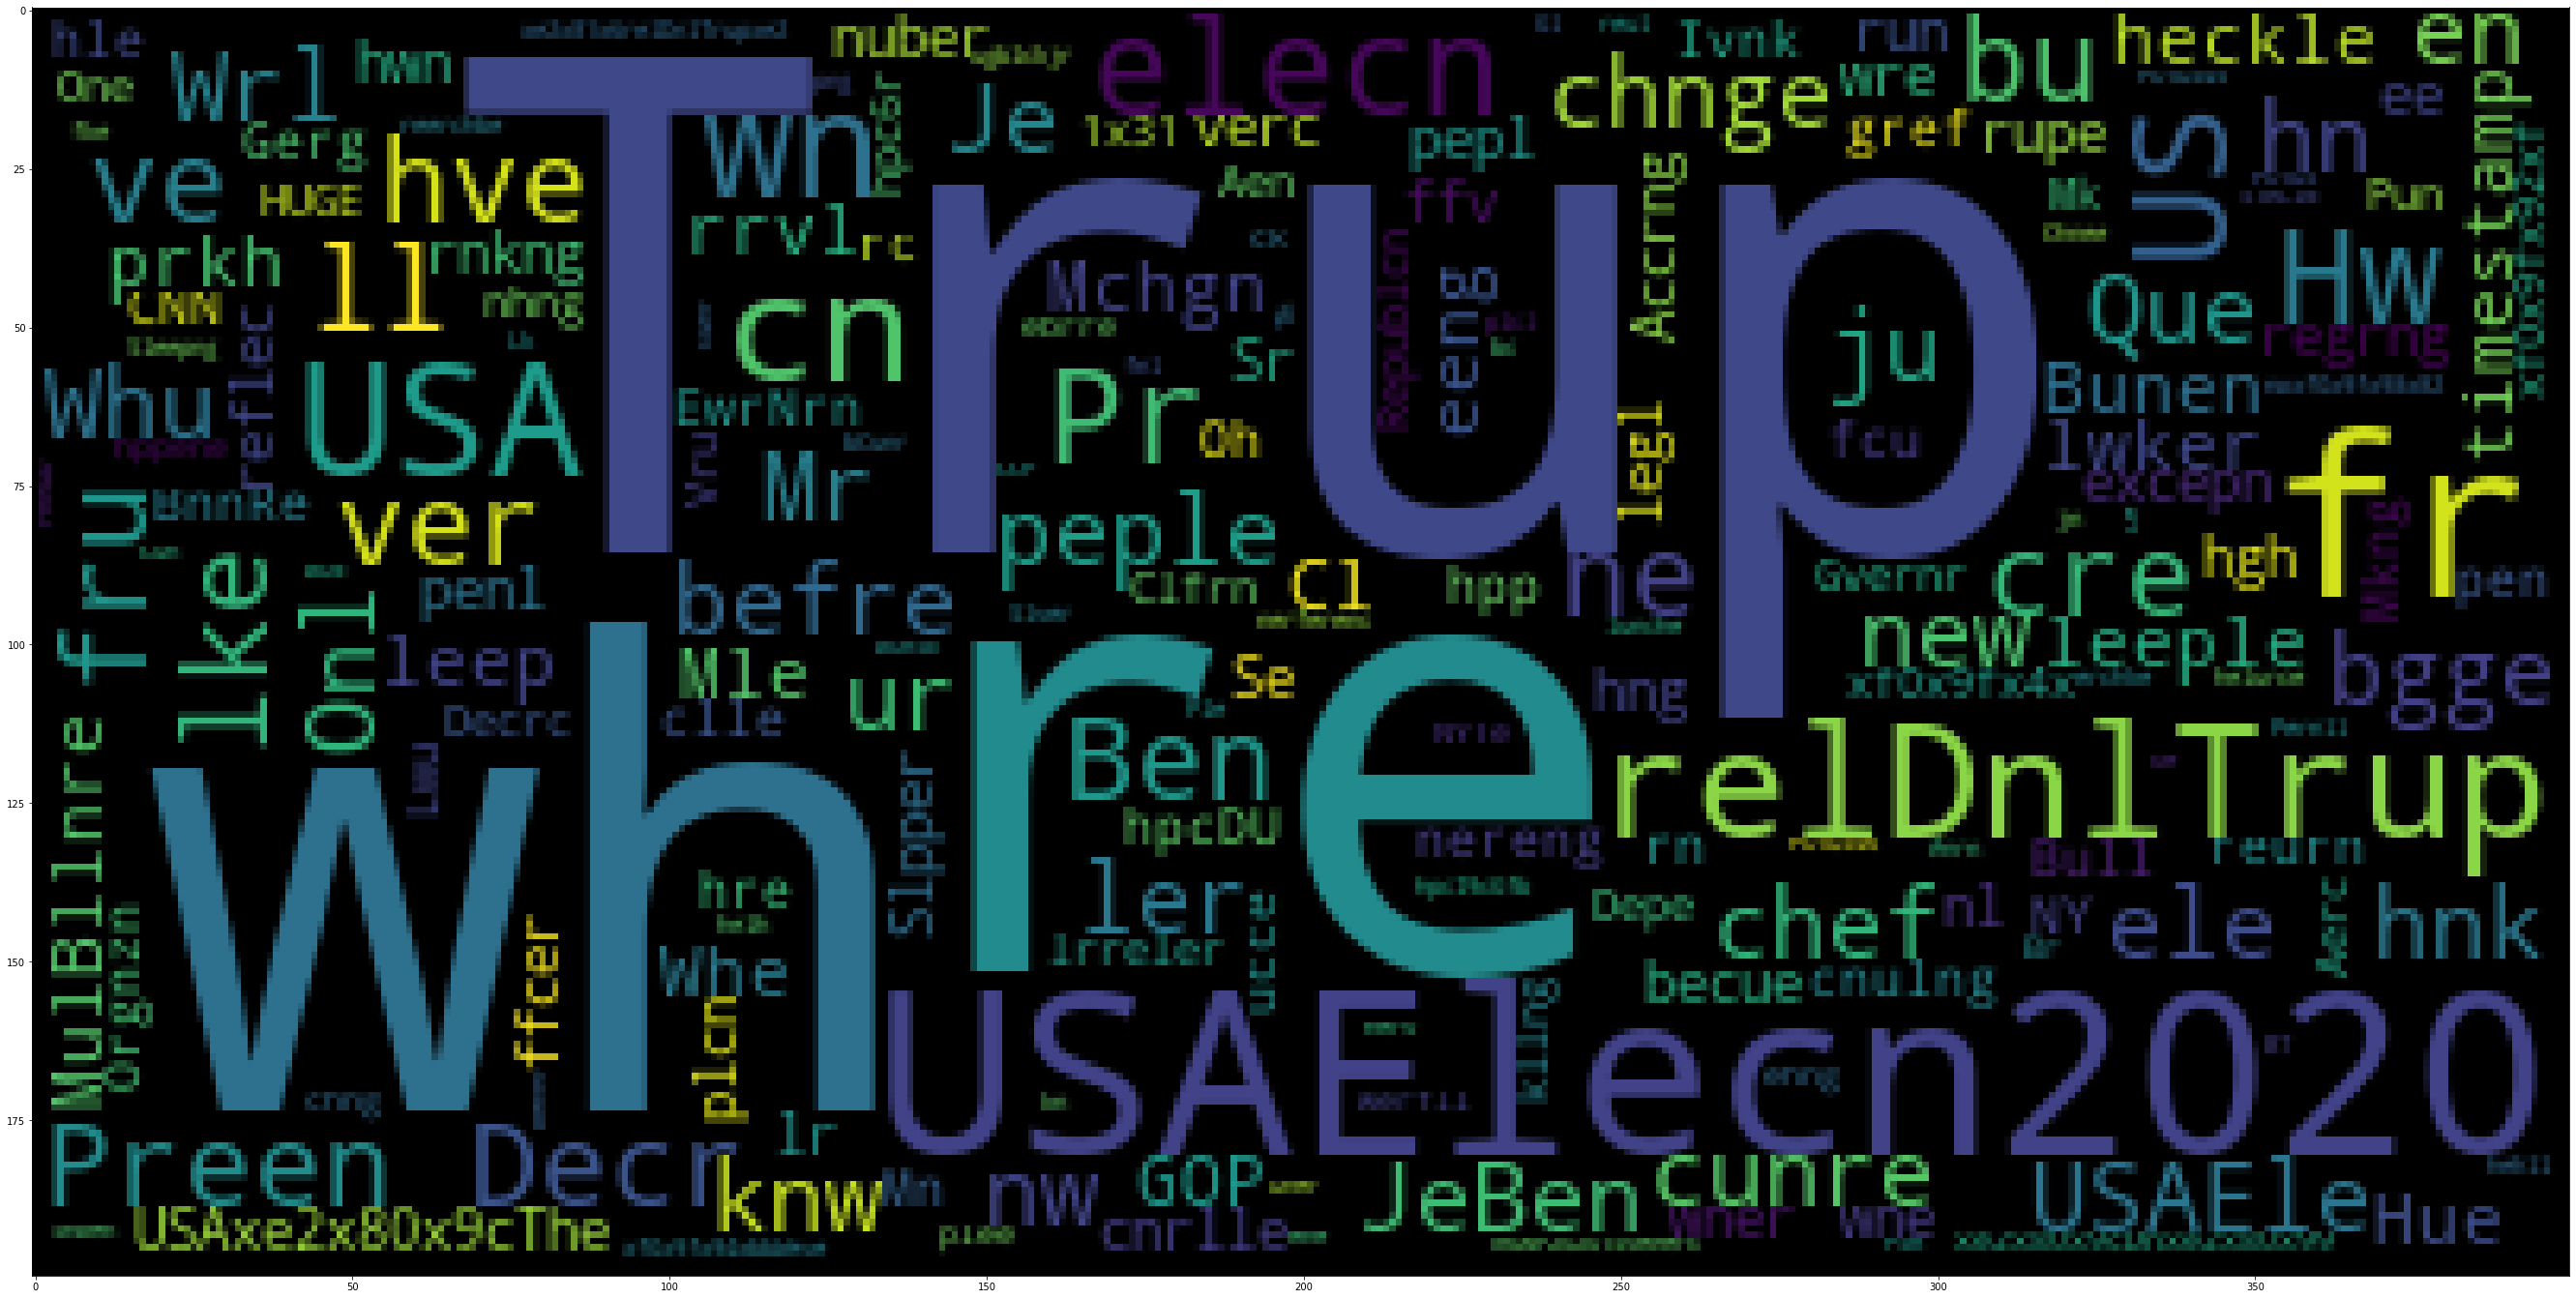

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud 
cloud = WordCloud().generate(str(df['tweets_lemmatize']))
fig=plt.figure(figsize=(47,47))
plt.imshow(cloud)

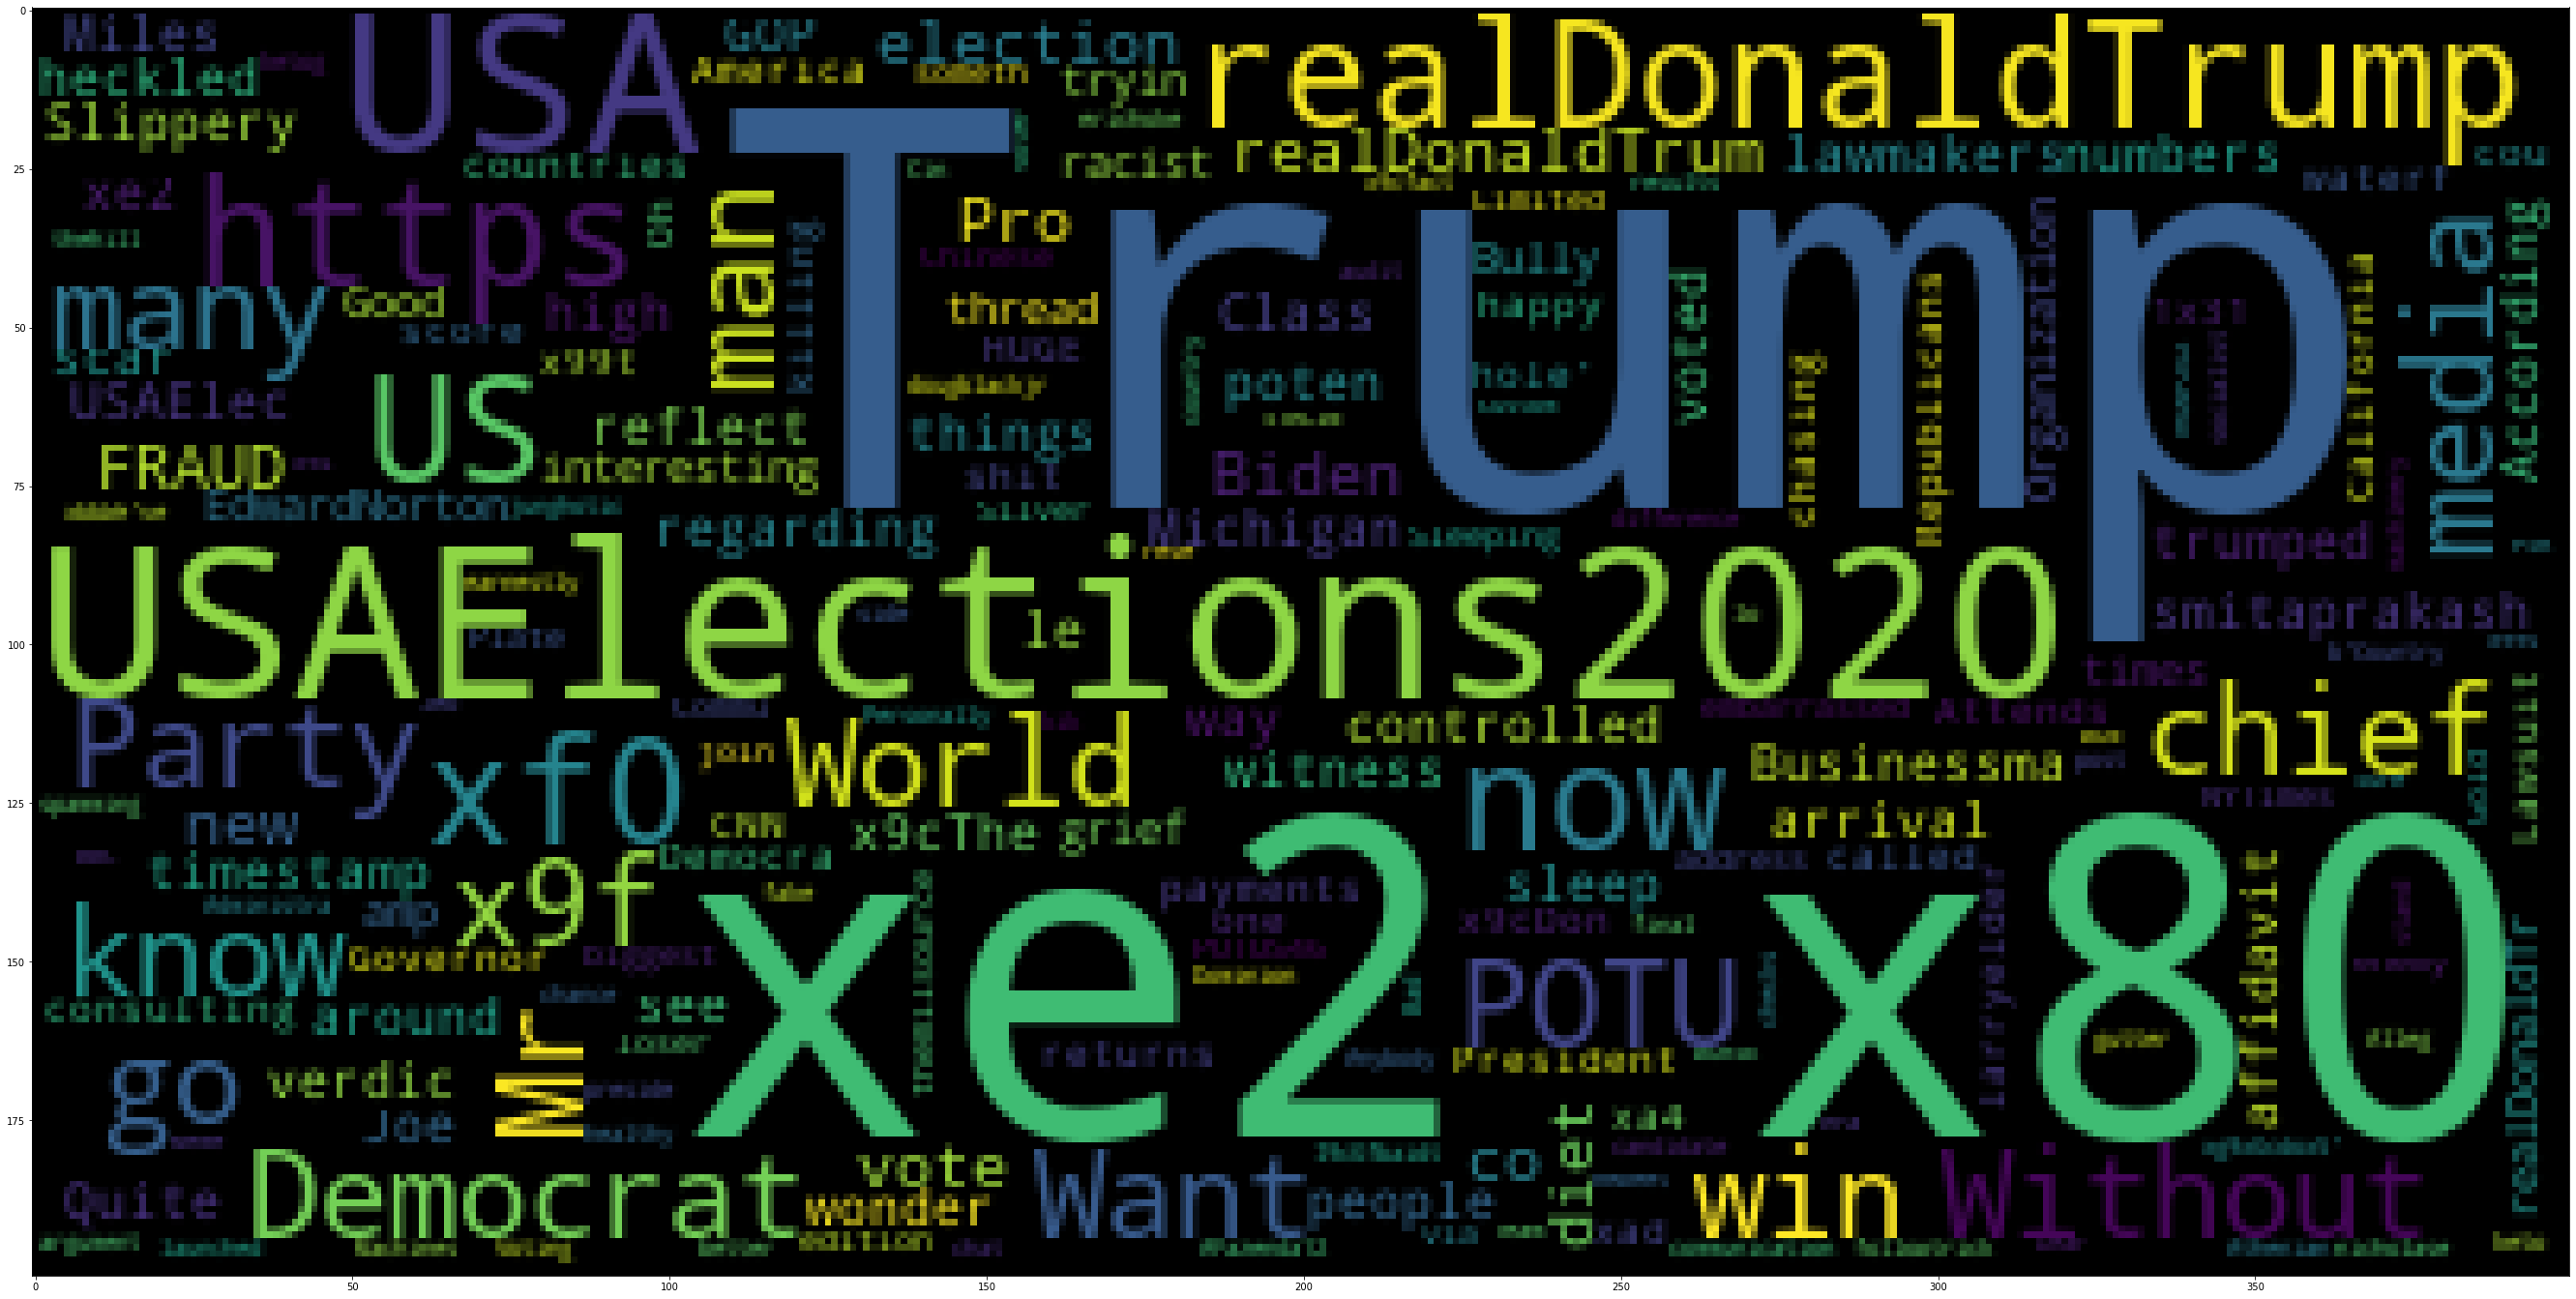

In [101]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud 
cloud = WordCloud().generate(str(df['tweet_text']))
fig=plt.figure(figsize=(47,47))
plt.imshow(cloud)